#  (MAS473) Introduction to Artificial Intelligence with Mathematics
# Homework #2: Linear Regression

# 0. Prerequisites

The purpose of this notebook is to practice for implementing some linear algebra (equations provided) using numpy and to explore some properties of linear regression.

NumPy Document
https://numpy.org/doc/stable/


You can use following packages in this HW:

In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Problem Setting

$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$
where $\boldsymbol x\in\mathbb{R}^D$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\boldsymbol\theta\in\mathbb{R}^D$ parametrizes the function.

We assume we have a training set $(\boldsymbol x_n, y_n)$, $n=1,\ldots, N$. We summarize the sets of training inputs in $\mathcal X = \{\boldsymbol x_1, \ldots, \boldsymbol x_N\}$ and corresponding training targets $\mathcal Y = \{y_1, \ldots, y_N\}$, respectively.

Our goal is to find good parameters $\boldsymbol\theta$.

# 2. Maximum Likelihood Estimation

 In maximum likelihood estimation, we find the parameters $\boldsymbol\theta^{\mathrm{ML}}$ that maximize the likelihood
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\,.
$$
From the lecture we know that the maximum likelihood estimator is given by
$$
\boldsymbol\theta^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y\in\mathbb{R}^D\,,
$$
where
$$
\boldsymbol X = [\boldsymbol x_1, \ldots, \boldsymbol x_N]^T\in\mathbb{R}^{N\times D}\,,\quad \boldsymbol y = [y_1, \ldots, y_N]^T \in\mathbb{R}^N\,.
$$

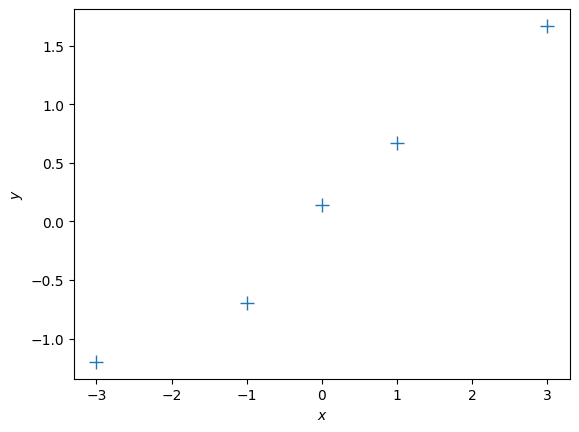

In [ ]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [ ]:
def max_lik_estimate(X, y):
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)

    N, D = X.shape
    Xt=X.transpose()
    theta_ml = np.matmul(np.linalg.inv(np.matmul(Xt,X)) , np.matmul(Xt,y))

    return theta_ml


In [ ]:
theta_ml = max_lik_estimate(X,y)

In [ ]:
def predict_with_estimate(Xtest, theta):

    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector

    prediction = np.matmul(Xtest,theta)

    return prediction

Now we define a test set.

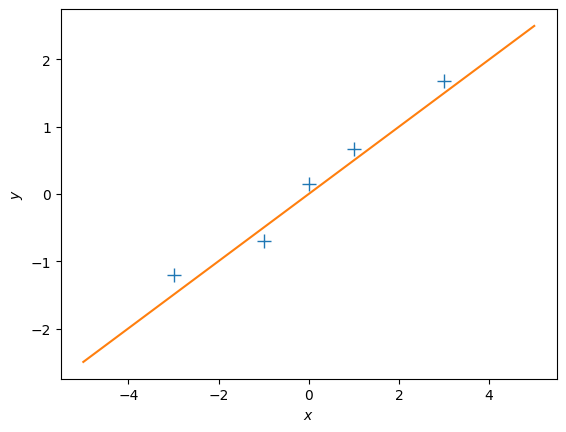

In [ ]:
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

#HW 1. Linear regression with bias term

1. Make a augmented version of the linear regression. When we have a bias term, then we can not use the previous method directly. Using a numpy library, fill the blank parts.

Hint. use "np.hstack([  ]) to add some terms to the original data matrix X. Then you can just follow the above case easily.

Please visit the numpy site as I wrote before.

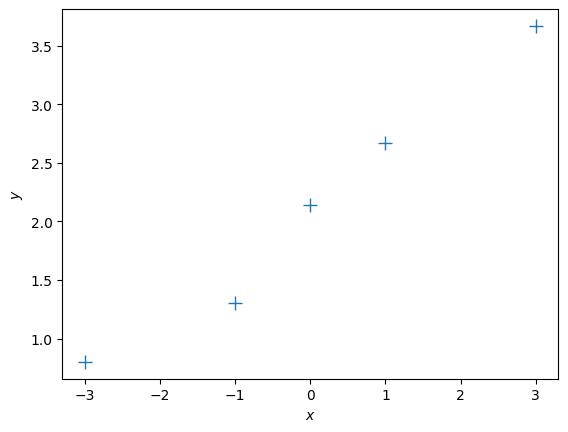

In [ ]:
ynew = y + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [ ]:
# Edit Here : Define the augmented training input and theta
N, D = X.shape
X_aug = np.hstack([np.ones((X.shape[0],1)), X]) # augmented training inputs of size N x (D+1)
theta_aug = np.vstack([np.ones((theta_ml.shape[0],1)), theta_ml]) # new theta vector of size (D+1) x 1

In [ ]:
## EDIT THIS FUNCTION
def max_lik_estimate_aug(X_aug, y):

    theta_aug_ml = max_lik_estimate(X_aug, ynew) ## <-- Edit Here

    return theta_aug_ml

In [ ]:
theta_aug_ml = max_lik_estimate_aug(X_aug, y)
print(theta_aug_ml)

[[2.116]
 [0.499]]


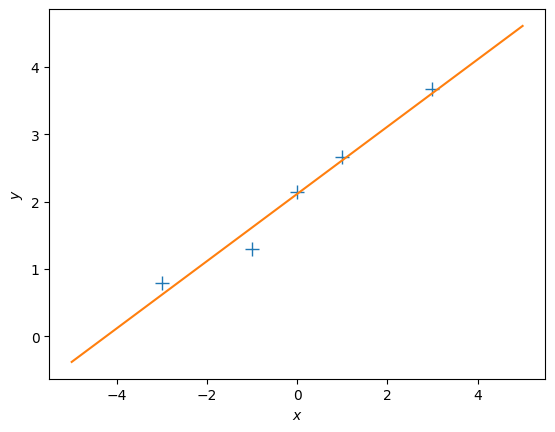

In [ ]:
# define a test set (we also need to augment the test inputs with ones)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest_aug, theta_aug_ml)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

# Nonlinear Features : Polynomial Regression
So far, we have looked at linear regression with linear features. This allowed us to fit straight lines. However, linear regression also allows us to fit functions that are nonlinear in the inputs $\boldsymbol x$, as long as the parameters $\boldsymbol\theta$ appear linearly. This means, we can learn functions of the form
$$
f(\boldsymbol x, \boldsymbol\theta) = \sum_{k = 1}^K \theta_k \phi_k(\boldsymbol x)\,,
$$
where the features $\phi_k(\boldsymbol x)$ are (possibly nonlinear) transformations of the inputs $\boldsymbol x$.

Let us have a look at an example where the observations clearly do not lie on a straight line:

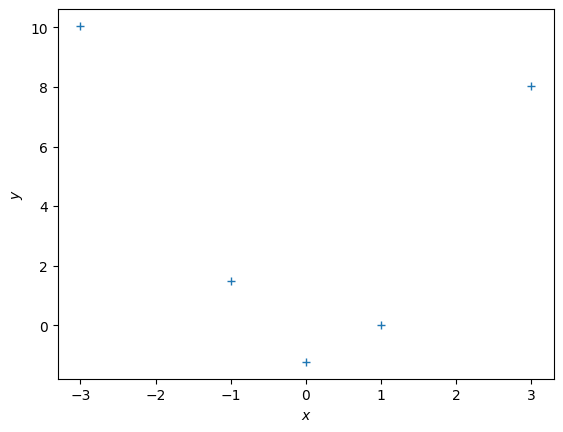

In [ ]:
y = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

One class of functions that is covered by linear regression is the family of polynomials because we can write a polynomial of degree $K$ as
$$
\sum_{k=0}^K \theta_k x^k = \boldsymbol \phi(x)^T\boldsymbol\theta\,,\quad
\boldsymbol\phi(x)=
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$
Here, $\boldsymbol\phi(x)$ is a nonlinear feature transformation of the inputs $x\in\mathbb{R}$.

Similar to the earlier case we can define a matrix that collects all the feature transformations of the training inputs:
$$
\boldsymbol\Phi = \begin{bmatrix}
\boldsymbol\phi(x_1) & \boldsymbol\phi(x_2) & \cdots & \boldsymbol\phi(x_n)
\end{bmatrix}^T \in\mathbb{R}^{N\times K+1}
$$

In [ ]:
def poly_features(X, K):

    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))

    X = X.flatten()
    N = X.shape[0]

    #initialize Phi
    Phi = np.zeros((N, K+1))

    # Compute the feature matrix in stages
    for i in range(K+1):
      for j in range(N):
        Phi[j][i]=X[j]**i

    return Phi

With this feature matrix we get the maximum likelihood estimator as
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
For reasons of numerical stability, we often add a small diagonal "jitter" $\kappa>0$ to $\boldsymbol\Phi^T\boldsymbol\Phi$ so that we can invert the matrix without significant problems so that the maximum likelihood estimate becomes
$$
\boldsymbol \theta^\text{ML} = (\boldsymbol\Phi^T\boldsymbol\Phi + \kappa\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$

In [ ]:
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1

    kappa = 1e-08 # 'jitter' term; good for numerical stability

    D = Phi.shape[1]
    Xt=Phi.transpose()
    # maximum likelihood estimate
    theta_ml = np.matmul(np.linalg.inv(np.matmul(Xt,Phi)+kappa*np.eye(D)) , np.matmul(Xt,y))


    return theta_ml

Now we have all the ingredients together: The computation of the feature matrix and the computation of the maximum likelihood estimator for polynomial regression. Let's see how this works.

To make predictions at test inputs $\boldsymbol X_{\text{test}}\in\mathbb{R}$, we need to compute the features (nonlinear transformations) $\boldsymbol\Phi_{\text{test}}= \boldsymbol\phi(\boldsymbol X_{\text{test}})$ of $\boldsymbol X_{\text{test}}$ to give us the predicted mean
$$
\mathbb{E}[\boldsymbol y_{\text{test}}] = \boldsymbol \Phi_{\text{test}}\boldsymbol\theta^{\text{ML}}
$$

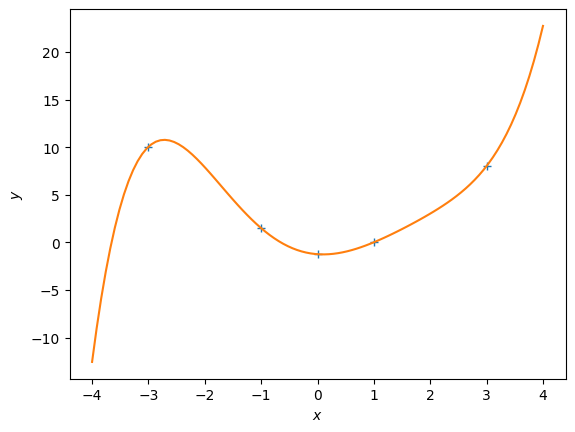

In [ ]:
K = 5 # Define the degree of the polynomial we wish to fit
Phi = poly_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

Let us have a look at a more interesting data set

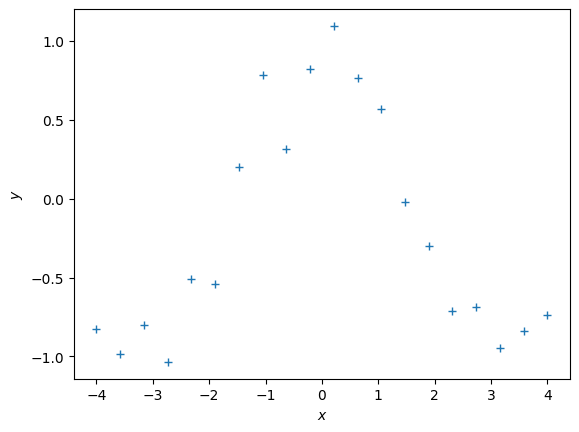

In [ ]:
def f(x):
    return np.cos(x) + 0.2 * np.random.normal(size=(x.shape))

X = np.linspace(-4,4,20).reshape(-1,1)
y = f(X)

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

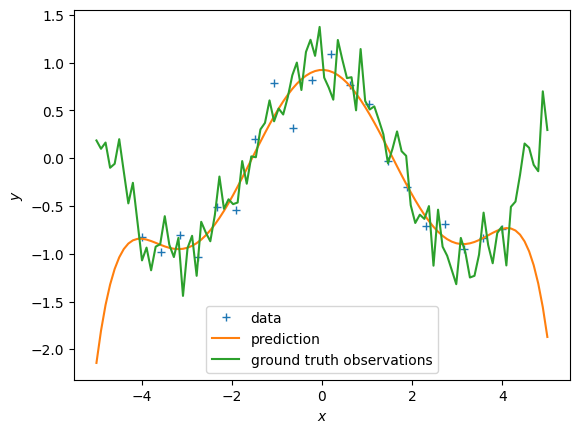

In [ ]:
K = 6 # Define the degree of the polynomial we wish to fit

Phi = poly_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = f(Xtest) # ground-truth y-values

# feature matrix for test inputs
Phi_test = poly_features(Xtest, K)

y_pred = np.matmul(Phi_test,theta_ml) # <-- EDIT THIS LINE

#raise NotImplementedError

# plot
plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.plot(Xtest, ytest)
plt.legend(["data", "prediction", "ground truth observations"])
plt.xlabel("$x$")
plt.ylabel("$y$");


#HW 2. Linear regression using different feature maps

(2)
Implement the cosine feature map. In the polynomial feature map, we use
$ \phi_{poly}(x) = [1,x,x^2,\cdots ,x^K]$
where $K$ is the degree of the polynomial. Similarily, we can use various feature map. In this part, we try to make a cos_feature map similar to the polynomial version.

$ \phi_{cos}(x) = [1, cos(x), cos(2x), \cdots ,cos(Kx)]$
where $K$ is the maximum frequency of the feature mapping.

And, you also make a sin_feature map. Compare the result of the regression to the cos_feature map version.

You have to draw 3 pictures ; one for underfitting, one for overfitting the other for best suggestion.


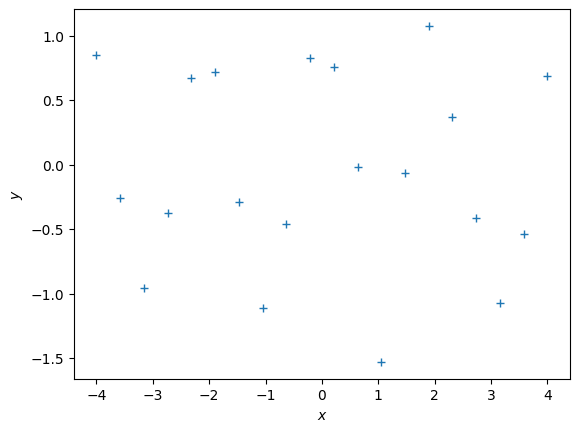

In [ ]:
def h(x):
    return np.cos(3*x) + 0.2 * np.random.normal(size=(x.shape))

X = np.linspace(-4,4,20).reshape(-1,1)
y = h(X)

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

In [ ]:
def cos_features(X, K):

    # X: inputs of size N x 1
    # K: maximum frequency of the cos(mx)
    # computes the feature matrix Phi (N x (K+1))

    X = X.flatten()
    N = X.shape[0]

    #initialize Phi
    Phi = np.zeros((N, K+1))

    # Edit Here. Compute the feature matrix in stages
    for i in range(K+1):
      for j in range(N):
        Phi[j][i]= np.cos(i*X[j]) #Edit Here / Phi[j][i]=X[j]**i

    return Phi

Also, we can make a sin feature map;

In [ ]:
def sin_features(X, K):

    # X: inputs of size N x 1
    # K: maximum frequency of the sin(mx)
    # computes the feature matrix Phi (N x (K+1))

    X = X.flatten()
    N = X.shape[0]

    #initialize Phi
    Phi = np.zeros((N, K+1))

    # Edit Here. Compute the feature matrix in stages
    for i in range(K+1):
      for j in range(N):
        Phi[j][i]= np.sin(i*X[j])  #Edit Here

    return Phi

In [ ]:
def MSE(x, y):
  mse = 0
  for i in range(len(x)):
    mse += (y[i]-x[i])**2
  return mse


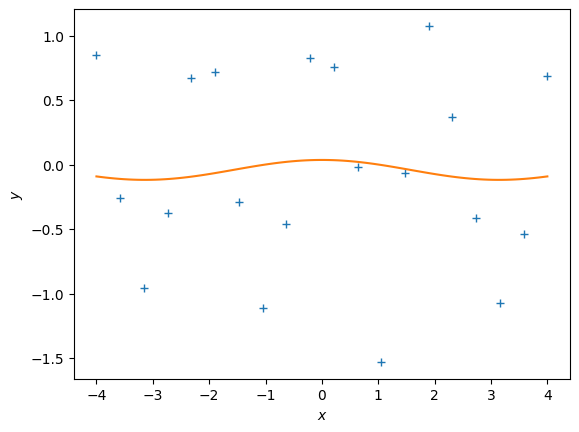

In [ ]:
K = 1 # Define the degree of the polynomial we wish to fit, Change K.
Phi = cos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = cos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [ ]:
print('MSE = ', MSE(y_pred[::5],y))

MSE =  [11.20877397]


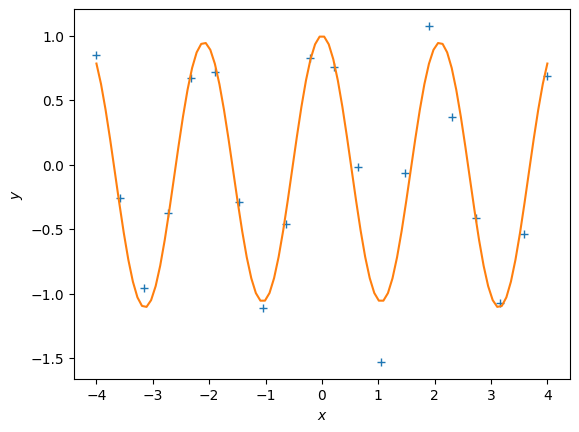

In [ ]:
K = 3 # Define the degree of the polynomial we wish to fit, Change K.
Phi = cos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = cos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [ ]:
print('MSE = ', MSE(y_pred[::5],y))

MSE =  [4.16797047]


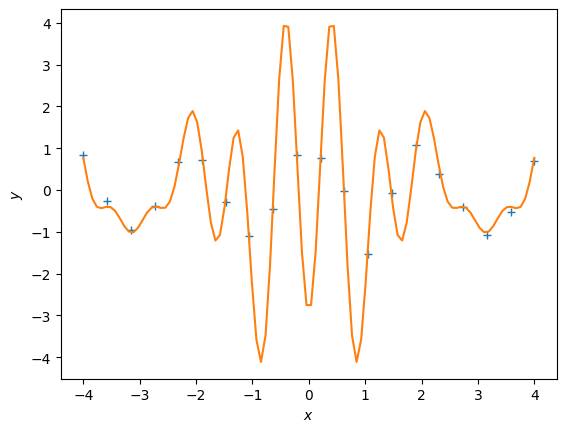

In [ ]:
K = 9 # Define the degree of the polynomial we wish to fit, Change K.
Phi = cos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = cos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [ ]:
print('MSE = ', MSE(y_pred[::5],y))

MSE =  [70.01425877]


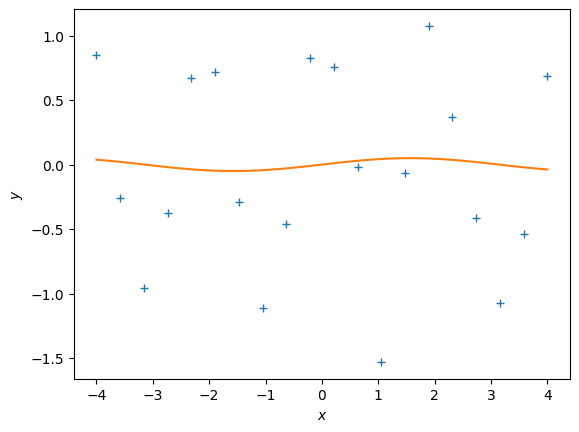

In [ ]:
K = 1 # Define the degree of the polynomial we wish to fit, Change K.
Phi = sin_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = sin_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [ ]:
print('MSE = ', MSE(y_pred[::5],y))

MSE =  [11.32963536]


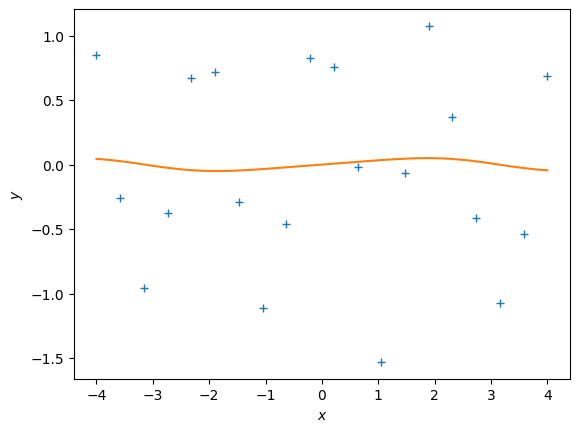

In [ ]:
K = 3 # Define the degree of the polynomial we wish to fit, Change K.
Phi = sin_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = sin_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [ ]:
print('MSE = ', MSE(y_pred[::5],y))

MSE =  [11.34294952]


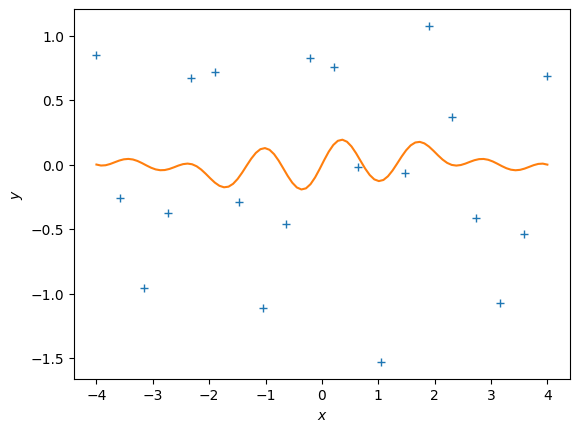

In [ ]:
K =  5 # Define the degree of the polynomial we wish to fit, Change K.
Phi = sin_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
Xtest = np.linspace(-4,4,100).reshape(-1,1)

# feature matrix for test inputs
Phi_test = sin_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [ ]:
print('MSE = ', MSE(y_pred[::5],y))

MSE =  [11.46432525]


#HW 3. Maximum A Posteriori Estimation

(3) Please follow the code and complete the code. You should implement the MAP estimation using NumPy Library. Try different $\alpha$ and describe what happens.

We are going to consider the MAP. Similar to the MLE, we consider the model
$$
y = \boldsymbol\phi(\boldsymbol x)^T\boldsymbol\theta + \epsilon\,,\quad \epsilon\sim\mathcal N(0,\sigma^2)\,.
$$
We assume that the noise variance $\sigma^2$ is known.

Instead of maximizing the likelihood, we can look at the maximum of the posterior distribution on the parameters $\boldsymbol\theta$, which is given as
$$
p(\boldsymbol\theta|\mathcal X, \mathcal Y) = \frac{\overbrace{p(\mathcal Y|\mathcal X, \boldsymbol\theta)}^{\text{likelihood}}\overbrace{p(\boldsymbol\theta)}^{\text{prior}}}{\underbrace{p(\mathcal Y|\mathcal X)}_{\text{evidence}}}
$$
The purpose of the parameter prior $p(\boldsymbol\theta)$ is to discourage the parameters to attain extreme values, a sign that the model overfits. The prior allows us to specify a "reasonable" range of parameter values. Typically, we choose a Gaussian prior $\mathcal N(\boldsymbol 0, \alpha^2\boldsymbol I)$, centered at $\boldsymbol 0$ with variance $\alpha^2$ along each parameter dimension.

The MAP estimate of the parameters is
$$
\boldsymbol\theta^{\text{MAP}} = (\boldsymbol\Phi^T\boldsymbol\Phi + \frac{\sigma^2}{\alpha^2}\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
where $\sigma^2$ is the variance of the noise.

In [ ]:
def map_estimate_poly(Phi, y, sigma, alpha):
    # Phi: training inputs, Size of N x D
    # y: training targets, Size of D x 1
    # sigma: standard deviation of the noise
    # alpha: standard deviation of the prior on the parameters
    # returns: MAP estimate theta_map, Size of D x 1

    D = Phi.shape[1]

    theta_map = np.matmul(np.linalg.inv(np.matmul(Phi.T,Phi)+sigma**2/(alpha**2)*np.identity(D)) , np.matmul(Phi.T,y))  #Edit Here

    return theta_map

In [ ]:
# define the function we wish to estimate later
def g(x, sigma):
    p = np.hstack([x**0, x**1, np.sin(x)])
    w = np.array([-1.0, 0.1, 1.0]).reshape(-1,1)
    return p @ w + sigma*np.random.normal(size=x.shape)

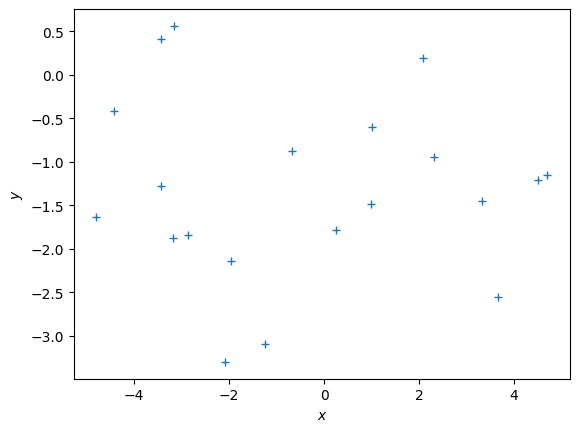

In [ ]:
# Generate some data
sigma = 1.0 # noise standard deviation
alpha = 1.0 # standard deviation of the parameter prior
N = 20

np.random.seed(42)

X = (np.random.rand(N)*10.0 - 5.0).reshape(-1,1)
y = g(X, sigma) # training targets

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

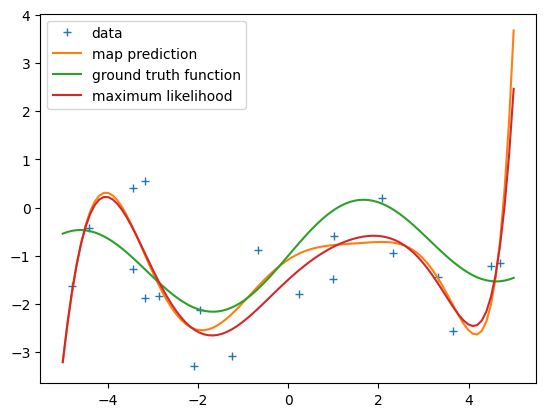

In [ ]:
# get the MAP estimate
K = 8 # polynomial degree, you have to try some other K's.

# feature matrix
Phi = poly_features(X, K)

theta_map = map_estimate_poly(Phi, y, sigma, alpha)

# maximum likelihood estimate
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = g(Xtest, sigma)

Phi_test = poly_features(Xtest, K)
y_pred_map = Phi_test @ theta_map
y_pred_mle = Phi_test @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred_map)
plt.plot(Xtest, g(Xtest, 0))
plt.plot(Xtest, y_pred_mle)

plt.legend(["data", "map prediction", "ground truth function", "maximum likelihood"]);

In [ ]:
print('MSE for MAP = ', MSE(y_pred_map,g(Xtest,0)))
print('MSE for MLE = ',MSE(y_pred_mle,g(Xtest,0)))

MSE for MAP =  [89.18989261]
MSE for MLE =  [73.7531025]
